### Подключение библиотек

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

### Функции подключения и загрузки

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = 'https://raw.githubusercontent.com/ageron/handson-ml/master/'
HOUSING_PATH = os.path.join('datasets','housing')
HOUSING_URL = DOWNLOAD_ROOT + 'datasets/housing/housing.tgz'

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housin.tgz')
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.csv')
    return pd.read_csv(csv_path)

### Подключение и загрузка данных

In [3]:
fetch_housing_data()
housing = load_housing_data()

### Ознакомление с данными

In [4]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E53D985C48>,
      dtype=object)

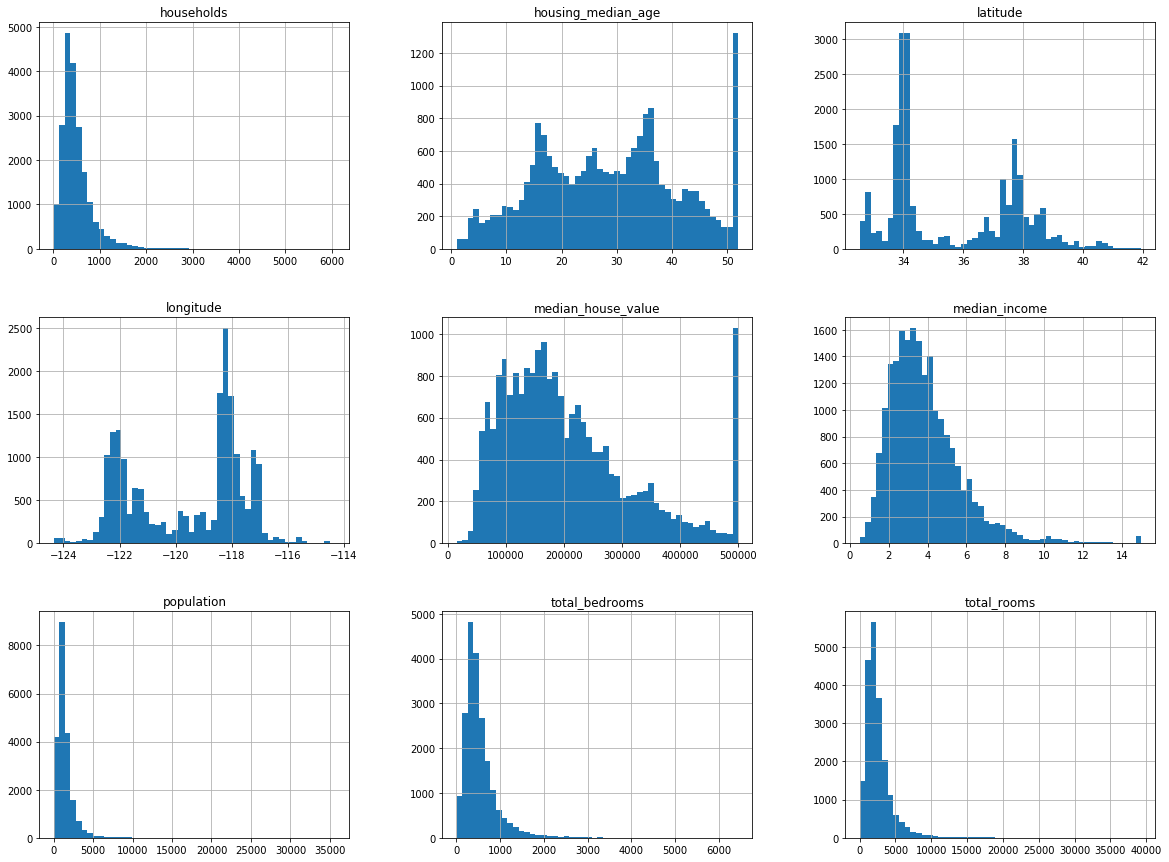

In [8]:
housing.hist(bins=50,figsize=(20,15))

### Создание испытательного набора

In [9]:
#Одноразовый набор

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffles_indices[:test_set_size]
    train_indices = shuffles_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
#Многоразовый набор, но исключительно для необновляющихся данных

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
#Создание репрезентативного атрибута для страт

housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
#housing['income_cat'].hist()
#housing['income_cat'].value_counts() / len(housing)

In [12]:
#Стратифицированная выборка (для отсутствия смещения)

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [13]:
#Возвращение данных в изначальный вид

for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

### Обнаружение и визуализация данных

In [14]:
#Копия

housing = strat_train_set.copy()

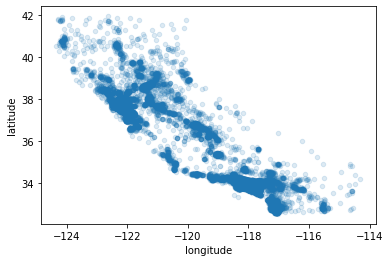

In [15]:
housing.plot(kind='scatter', y='latitude', x='longitude', alpha=0.15)

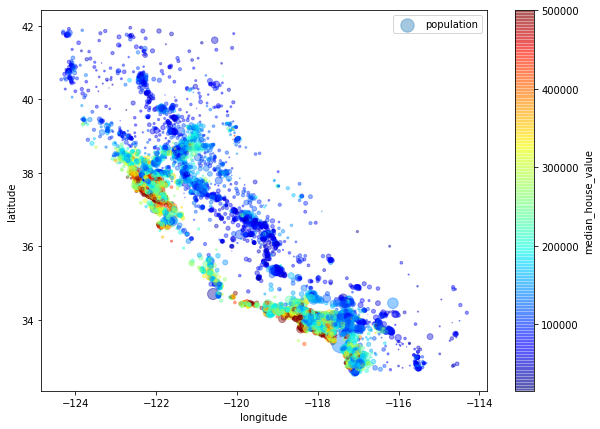

In [16]:
#визуализация

import matplotlib.pyplot as plt
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, label='population', figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            sharex=False)
plt.legend()

In [17]:
#Поиск зависимостей (корреляций)

corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E539A60108>,
      dtype=object)

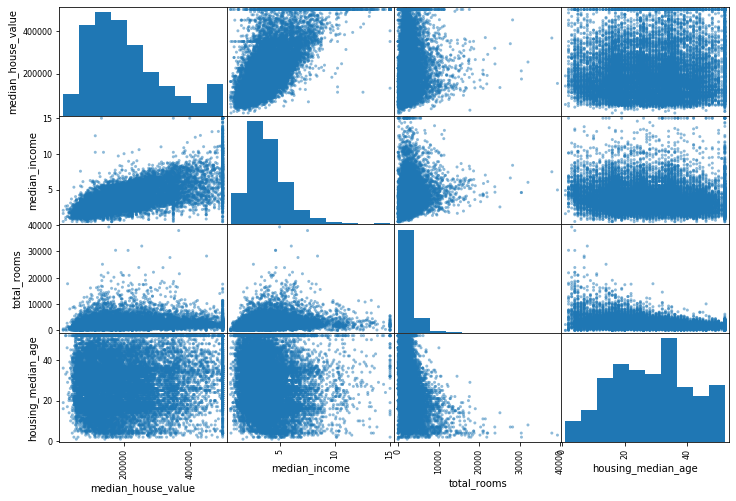

In [18]:
#Рассматриваем наиболее заметные корреляции

from pandas.plotting import scatter_matrix
attributes=['median_house_value', 'median_income', 'total_rooms',
           'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

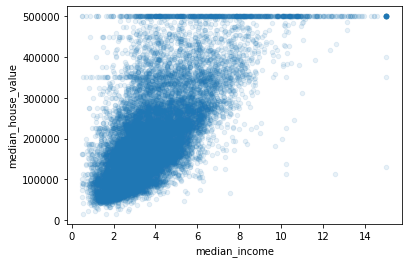

In [19]:
#Самая значимая корреляция

housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

### Новые атрибуты

In [20]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['median_income_per_population'] = housing['median_income'] / housing['population']
housing['age'] = housing['housing_median_age'] / housing['longitude']
housing['population_per_hholds'] = housing['population'] / housing['households']

corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value              1.000000
median_income                   0.687160
rooms_per_household             0.146285
total_rooms                     0.135097
median_income_per_population    0.115985
housing_median_age              0.114110
households                      0.064506
total_bedrooms                  0.047689
population_per_hholds          -0.021985
population                     -0.026920
longitude                      -0.047432
age                            -0.111953
latitude                       -0.142724
bedrooms_per_room              -0.259984
Name: median_house_value, dtype: float64

### Подготовка данных

In [21]:
#Создание меток

housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [22]:
#Заполнение данных

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

housing_num = housing.drop('ocean_proximity', axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [23]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [24]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [25]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

### Специальные трансформаторы

In [26]:
#Добавление атрибутов

from sklearn.base import BaseEstimator, TransformerMixin

longitude_ix, housing_median_age_ix, rooms_ix, bedrooms_ix, population_ix, household_ix, median_income_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households", 
                'longitude', 'housing_median_age', 'median_income')]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        median_income_per_population = X[:, median_income_ix] / X[:, population_ix]
        age = X[:, housing_median_age_ix] / X[:, longitude_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                        bedrooms_per_room, median_income_per_population, age]
        else:
            return np.c_[X, rooms_per_household, population_per_household, median_income_per_population, age]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [27]:
from sklearn.preprocessing import FunctionTransformer

def AttributesAdder(X, add_bedrooms_per_room=True):
    rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
    population_per_household = X[:, population_ix] / X[:, household_ix]
    median_income_per_population = X[:, median_income_ix] / X[:, population_ix]
    age = X[:, housing_median_age_ix] / X[:, longitude_ix]
    if add_bedrooms_per_room:
        bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, rooms_per_household, population_per_household,
                    bedrooms_per_room, median_income_per_population, age]
    else:
        return np.c_[X, rooms_per_household, population_per_household, median_income_per_population, age]

attr_adder = FunctionTransformer(AttributesAdder)
housing_extra_attribs = attr_adder.fit_transform(housing.values)

In [28]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns = list(housing.columns) + ['rooms_per_household', 'population_per_household', 'bedrooms_per_room',
                                       'median_income_per_population', 'age'],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room,median_income_per_population,age
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,18.6842,-3.20763,0.477465,-0.0221856,0.223852
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,21.8571,-8.70929,0.369281,-0.0526646,0.159057
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,30.1935,-3.78065,0.49359,-0.0244206,0.241291
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,58.4,-4.7844,0.241781,-0.0157504,0.200866
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,262.294,-6.97588,0.3281,-0.0255898,0.231341


### Конвейеры Трансформации

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [30]:
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

In [31]:
# Числовой конвейер

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', FunctionTransformer(AttributesAdder)),
    ('std_scaler', StandardScaler()),
])

In [32]:
#Полный Конвейер

from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

In [33]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [34]:
housing_prepared.shape

(16512, 18)

### Обучение и оценка


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def display_scores(scores):
    print('Суммы оценок:', scores)
    print('Среднее:', scores.mean())
    print('Стандартное отклонение:', scores.std())

In [36]:
#Линейная Регрессия

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

65949.42919709979

In [37]:
lin_scores = cross_val_score(lin_reg, housing_prepared,
                             housing_labels, scoring='neg_mean_squared_error', cv = 10, verbose = 2)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  ................................................................
[CV] ................................................. , total=   0.0s
[CV]  

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [38]:
#Деревья принятия решений

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [39]:
scores = cross_val_score(tree_reg, housing_prepared,
                        housing_labels, scoring = 'neg_mean_squared_error', cv=10, verbose = 4)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .......................... , score=-5492530214.803, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .......................... , score=-4762795444.597, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV] .......................... , score=-5060341484.718, total=   0.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] .......................... , score=-5230213017.111, total=   0.2s
[CV]  ................................................................
[CV] .......................... , score=-4732415148.921, total=   0.2s
[CV]  ................................................................
[CV] .......................... , score=-5576519753.160, total=   0.2s
[CV]  ................................................................
[CV] .......................... , score=-5219069185.746, total=   0.2s
[CV]  ................................................................
[CV] .......................... , score=-5278457786.108, total=   0.2s
[CV]  ................................................................
[CV] .......................... , score=-5296381515.737, total=   0.2s
[CV]  ................................................................
[CV] .......................... , score=-5177652436.500, total=   0.2s
Суммы оценок: [74111.60647836 69013.00924172 71136.07723735 72320.21167773
 6

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.3s finished


In [40]:
#Случайные леса

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18869.69942309214

In [41]:
forest_scores = cross_val_score(forest_reg, housing_prepared,
                                housing_labels, scoring = 'neg_mean_squared_error', cv = 10, verbose = 4)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] .......................... , score=-2523465666.670, total=  15.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.0s remaining:    0.0s


[CV] .......................... , score=-2298586896.631, total=  13.8s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   28.8s remaining:    0.0s


[CV] .......................... , score=-2629329928.220, total=  14.1s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   42.9s remaining:    0.0s


[CV] .......................... , score=-2764786590.182, total=  14.1s
[CV]  ................................................................
[CV] .......................... , score=-2512409323.005, total=  14.1s
[CV]  ................................................................
[CV] .......................... , score=-2965710568.481, total=  14.0s
[CV]  ................................................................
[CV] .......................... , score=-2409569928.050, total=  14.0s
[CV]  ................................................................
[CV] .......................... , score=-2337525421.098, total=  13.9s
[CV]  ................................................................
[CV] .......................... , score=-2853738066.105, total=  14.1s
[CV]  ................................................................
[CV] .......................... , score=-2642755517.875, total=  13.9s
Суммы оценок: [50234.10859835 47943.58034848 51276.99219162 52581.23800541
 5

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished


In [42]:
#Метод опорных векторов

from sklearn.svm import SVR

vec_reg = SVR()
vec_reg.fit(housing_prepared, housing_labels)
housing_predictions = vec_reg.predict(housing_prepared)
vec_mse = mean_squared_error(housing_labels, housing_predictions)
vec_rmse = np.sqrt(vec_mse)
vec_rmse

118472.81695154346

In [43]:
vec_scores = cross_val_score(vec_reg, housing_prepared,
                            housing_labels, scoring = 'neg_mean_squared_error', cv = 10, verbose = 4)
vec_rmse_scores = np.sqrt(-vec_scores)
display_scores(vec_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[CV] ......................... , score=-12387251806.636, total=  11.2s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.1s remaining:    0.0s


[CV] ......................... , score=-14271142911.721, total=  11.3s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   22.4s remaining:    0.0s


[CV] ......................... , score=-13658851206.753, total=  11.0s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   33.4s remaining:    0.0s


[CV] ......................... , score=-14484852483.242, total=  11.0s
[CV]  ................................................................
[CV] ......................... , score=-13808539278.661, total=  11.0s
[CV]  ................................................................
[CV] ......................... , score=-14929025093.953, total=  11.0s
[CV]  ................................................................
[CV] ......................... , score=-13816389440.586, total=  11.1s
[CV]  ................................................................
[CV] ......................... , score=-14735188826.731, total=  11.1s
[CV]  ................................................................
[CV] ......................... , score=-14465076307.753, total=  11.1s
[CV]  ................................................................
[CV] ......................... , score=-13904463678.700, total=  11.1s
Суммы оценок: [111298.03145894 119461.88895092 116871.08798481 120353.0327131

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished


### Точная настройка

In [44]:
#Оптимизация Опорных векторов

from sklearn.model_selection import GridSearchCV

param_grid_svr = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [10., 30., 100., 300., 1000.0, 3000.0, 10000.0, 30000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]
vec_reg = SVR()
grid_search = GridSearchCV(vec_reg, param_grid_svr, cv=5, scoring='neg_mean_squared_error', verbose=6)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... C=10.0, kernel=linear, score=-5487178942.890, total=   5.5s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] ..... C=10.0, kernel=linear, score=-5757503656.580, total=   5.6s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   11.0s remaining:    0.0s


[CV] ..... C=10.0, kernel=linear, score=-5950598189.405, total=   5.5s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   16.5s remaining:    0.0s


[CV] ..... C=10.0, kernel=linear, score=-5592205537.191, total=   5.6s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   22.0s remaining:    0.0s


[CV] ..... C=10.0, kernel=linear, score=-6086162558.017, total=   5.5s
[CV] C=30.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   27.6s remaining:    0.0s


[CV] ..... C=30.0, kernel=linear, score=-4624529031.765, total=   5.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] ..... C=30.0, kernel=linear, score=-5014240202.894, total=   5.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] ..... C=30.0, kernel=linear, score=-5079063032.582, total=   5.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] ..... C=30.0, kernel=linear, score=-4663292976.212, total=   5.4s
[CV] C=30.0, kernel=linear ...........................................
[CV] ..... C=30.0, kernel=linear, score=-5158372179.473, total=   5.5s
[CV] C=100.0, kernel=linear ..........................................
[CV] .... C=100.0, kernel=linear, score=-4353333513.496, total=   5.4s
[CV] C=100.0, kernel=linear ..........................................
[CV] .... C=100.0, kernel=linear, score=-4886241750.720, total=   5.3s
[CV] C=100.0, kernel=linear ..........................................
[CV] .

[CV]  C=10.0, gamma=1.0, kernel=rbf, score=-14330177388.706, total=   8.8s
[CV] C=10.0, gamma=1.0, kernel=rbf ...................................
[CV]  C=10.0, gamma=1.0, kernel=rbf, score=-14248264666.593, total=   9.0s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV]  C=10.0, gamma=3.0, kernel=rbf, score=-13394910999.449, total=  10.4s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV]  C=10.0, gamma=3.0, kernel=rbf, score=-14150284792.184, total=  10.6s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV]  C=10.0, gamma=3.0, kernel=rbf, score=-14472657673.950, total=  10.6s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV]  C=10.0, gamma=3.0, kernel=rbf, score=-14375536807.271, total=  11.0s
[CV] C=10.0, gamma=3.0, kernel=rbf ...................................
[CV]  C=10.0, gamma=3.0, kernel=rbf, score=-14290010845.939, total=  11.0s
[CV] C=30.0, gamma=0.01, kernel=rbf .............

[CV]  C=100.0, gamma=0.3, kernel=rbf, score=-11727797266.745, total=   9.0s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV]  C=100.0, gamma=1.0, kernel=rbf, score=-12941481975.525, total=   8.9s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV]  C=100.0, gamma=1.0, kernel=rbf, score=-13665375459.189, total=   8.9s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV]  C=100.0, gamma=1.0, kernel=rbf, score=-13992264712.572, total=   8.8s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV]  C=100.0, gamma=1.0, kernel=rbf, score=-13905927784.506, total=   8.9s
[CV] C=100.0, gamma=1.0, kernel=rbf ..................................
[CV]  C=100.0, gamma=1.0, kernel=rbf, score=-13831922809.785, total=   8.8s
[CV] C=100.0, gamma=3.0, kernel=rbf ..................................
[CV]  C=100.0, gamma=3.0, kernel=rbf, score=-13344626590.346, total=  10.3s
[CV] C=100.0, gamma=3.0, kernel=rbf ......

[CV]  C=1000.0, gamma=0.3, kernel=rbf, score=-6455135681.676, total=   8.8s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV]  C=1000.0, gamma=0.3, kernel=rbf, score=-7088142022.167, total=   8.7s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV]  C=1000.0, gamma=0.3, kernel=rbf, score=-7182848075.070, total=   8.7s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV]  C=1000.0, gamma=0.3, kernel=rbf, score=-6904429272.512, total=   8.9s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV]  C=1000.0, gamma=0.3, kernel=rbf, score=-6972285019.530, total=   8.9s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV]  C=1000.0, gamma=1.0, kernel=rbf, score=-10520964158.517, total=   8.9s
[CV] C=1000.0, gamma=1.0, kernel=rbf .................................
[CV]  C=1000.0, gamma=1.0, kernel=rbf, score=-11243086280.627, total=   9.0s
[CV] C=1000.0, gamma=1.0, kernel=rbf ...

[CV]  C=10000.0, gamma=0.1, kernel=rbf, score=-3558034960.924, total=   8.9s
[CV] C=10000.0, gamma=0.1, kernel=rbf ................................
[CV]  C=10000.0, gamma=0.1, kernel=rbf, score=-3717569264.796, total=   8.9s
[CV] C=10000.0, gamma=0.1, kernel=rbf ................................
[CV]  C=10000.0, gamma=0.1, kernel=rbf, score=-3055976610.037, total=   9.0s
[CV] C=10000.0, gamma=0.1, kernel=rbf ................................
[CV]  C=10000.0, gamma=0.1, kernel=rbf, score=-3597979286.391, total=   8.9s
[CV] C=10000.0, gamma=0.3, kernel=rbf ................................
[CV]  C=10000.0, gamma=0.3, kernel=rbf, score=-3624869958.036, total=   9.3s
[CV] C=10000.0, gamma=0.3, kernel=rbf ................................
[CV]  C=10000.0, gamma=0.3, kernel=rbf, score=-4006224158.389, total=   9.0s
[CV] C=10000.0, gamma=0.3, kernel=rbf ................................
[CV]  C=10000.0, gamma=0.3, kernel=rbf, score=-4099642252.654, total=   9.0s
[CV] C=10000.0, gamma=0.3, kernel=r

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed: 42.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'kernel': ['linear']},
                         {'C': [10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0,
                                10000.0, 30000.0],
                          'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=6)

In [45]:
grid_search.best_params_

{'C': 30000.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [46]:
grid_search.best_estimator_

SVR(C=30000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [47]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],
                             cvres['params']):
    print(np.sqrt(-mean_score), params)

75991.64280903903 {'C': 10.0, 'kernel': 'linear'}
70056.4021670062 {'C': 30.0, 'kernel': 'linear'}
68312.3445901846 {'C': 100.0, 'kernel': 'linear'}
67815.36719693778 {'C': 300.0, 'kernel': 'linear'}
67583.11709144978 {'C': 1000.0, 'kernel': 'linear'}
67514.10218676475 {'C': 3000.0, 'kernel': 'linear'}
67472.32794487427 {'C': 10000.0, 'kernel': 'linear'}
67454.09841942375 {'C': 30000.0, 'kernel': 'linear'}
117158.92070585188 {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}
115693.88376500353 {'C': 10.0, 'gamma': 0.03, 'kernel': 'rbf'}
115665.99075815098 {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
117535.64520898671 {'C': 10.0, 'gamma': 0.3, 'kernel': 'rbf'}
118711.26693294238 {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
118897.77215641408 {'C': 10.0, 'gamma': 3.0, 'kernel': 'rbf'}
113720.67631017971 {'C': 30.0, 'gamma': 0.01, 'kernel': 'rbf'}
109731.84883852159 {'C': 30.0, 'gamma': 0.03, 'kernel': 'rbf'}
109775.70324190418 {'C': 30.0, 'gamma': 0.1, 'kernel': 'rbf'}
115020.48313622363 {'C': 30.

In [48]:
#Случайные Леса

param_grid = [
    {'n_estimators':[100, 150, 200], 'max_features':[6, 8, 10, 12]},
    {'bootstrap': [False], 'n_estimators': [130, 150, 180, 210],
     'max_features': [7, 9, 11]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error', verbose = 6)
grid_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_features=6, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=6, n_estimators=100, score=-2421001963.620, total=   4.7s
[CV] max_features=6, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.6s remaining:    0.0s


[CV]  max_features=6, n_estimators=100, score=-2644903712.597, total=   4.6s
[CV] max_features=6, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.2s remaining:    0.0s


[CV]  max_features=6, n_estimators=100, score=-2762997321.845, total=   4.7s
[CV] max_features=6, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   14.0s remaining:    0.0s


[CV]  max_features=6, n_estimators=100, score=-2417453844.070, total=   4.7s
[CV] max_features=6, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   18.6s remaining:    0.0s


[CV]  max_features=6, n_estimators=100, score=-2729969581.977, total=   4.6s
[CV] max_features=6, n_estimators=150 ................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   23.3s remaining:    0.0s


[CV]  max_features=6, n_estimators=150, score=-2408716034.274, total=   7.0s
[CV] max_features=6, n_estimators=150 ................................
[CV]  max_features=6, n_estimators=150, score=-2649442445.678, total=   7.5s
[CV] max_features=6, n_estimators=150 ................................
[CV]  max_features=6, n_estimators=150, score=-2733189673.845, total=   7.1s
[CV] max_features=6, n_estimators=150 ................................
[CV]  max_features=6, n_estimators=150, score=-2405339232.745, total=   7.1s
[CV] max_features=6, n_estimators=150 ................................
[CV]  max_features=6, n_estimators=150, score=-2680879719.183, total=   7.0s
[CV] max_features=6, n_estimators=200 ................................
[CV]  max_features=6, n_estimators=200, score=-2379514438.715, total=   9.4s
[CV] max_features=6, n_estimators=200 ................................
[CV]  max_features=6, n_estimators=200, score=-2636015179.385, total=  10.0s
[CV] max_features=6, n_estimators=2

[CV]  bootstrap=False, max_features=7, n_estimators=130, score=-2577587528.099, total=  11.0s
[CV] bootstrap=False, max_features=7, n_estimators=130 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=130, score=-2662694070.226, total=  11.2s
[CV] bootstrap=False, max_features=7, n_estimators=130 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=130, score=-2386913728.216, total=  11.2s
[CV] bootstrap=False, max_features=7, n_estimators=130 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=130, score=-2638653900.621, total=  11.1s
[CV] bootstrap=False, max_features=7, n_estimators=150 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=150, score=-2368477716.513, total=  12.8s
[CV] bootstrap=False, max_features=7, n_estimators=150 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=150, score=-2584786395.636, total=  13.5s
[CV] bootstrap=False, max_features=7, n_estimators=150 ...............
[CV]  boot

[CV]  bootstrap=False, max_features=11, n_estimators=180, score=-2670952581.501, total=  23.2s
[CV] bootstrap=False, max_features=11, n_estimators=180 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=180, score=-2712764560.151, total=  23.2s
[CV] bootstrap=False, max_features=11, n_estimators=180 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=180, score=-2436613667.933, total=  22.9s
[CV] bootstrap=False, max_features=11, n_estimators=180 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=180, score=-2712096403.515, total=  22.9s
[CV] bootstrap=False, max_features=11, n_estimators=210 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=210, score=-2471507905.537, total=  26.7s
[CV] bootstrap=False, max_features=11, n_estimators=210 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=210, score=-2635402431.612, total=  26.5s
[CV] bootstrap=False, max_features=11, n_estimators=210 ..............
[CV]

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 27.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [49]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 7, 'n_estimators': 180}

In [50]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [62]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],
                             cvres['params']):
    print(np.sqrt(-mean_score), params)

50943.74627784686 {'max_features': 6, 'n_estimators': 100}
50749.51646217888 {'max_features': 6, 'n_estimators': 150}
50582.318098095224 {'max_features': 6, 'n_estimators': 200}
50657.515946932486 {'max_features': 8, 'n_estimators': 100}
50685.72352867483 {'max_features': 8, 'n_estimators': 150}
50566.83116245745 {'max_features': 8, 'n_estimators': 200}
50712.38911960393 {'max_features': 10, 'n_estimators': 100}
50644.94336819761 {'max_features': 10, 'n_estimators': 150}
50602.72011402402 {'max_features': 10, 'n_estimators': 200}
50987.177349678605 {'max_features': 12, 'n_estimators': 100}
50751.048398329636 {'max_features': 12, 'n_estimators': 150}
50813.40575353117 {'max_features': 12, 'n_estimators': 200}
50292.7570648611 {'bootstrap': False, 'max_features': 7, 'n_estimators': 130}
50185.65709303756 {'bootstrap': False, 'max_features': 7, 'n_estimators': 150}
50076.77704907933 {'bootstrap': False, 'max_features': 7, 'n_estimators': 180}
50148.03321743595 {'bootstrap': False, 'max_fe

In [63]:
#Случайный поиск

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

params = {
    'n_estimators' : randint(low=10, high=250),
    'max_features' : randint(low=3, high=15),
    'bootstrap' : [False],
}

forest_reg = RandomForestRegressor(random_state = 42)
rnd_search = RandomizedSearchCV(forest_reg, params, n_iter = 50, scoring='neg_mean_squared_error', cv=5, verbose = 6)
rnd_search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] bootstrap=False, max_features=8, n_estimators=98 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=False, max_features=8, n_estimators=98, score=-2407688953.593, total=  10.2s
[CV] bootstrap=False, max_features=8, n_estimators=98 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.1s remaining:    0.0s


[CV]  bootstrap=False, max_features=8, n_estimators=98, score=-2573487532.114, total=  10.3s
[CV] bootstrap=False, max_features=8, n_estimators=98 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   20.4s remaining:    0.0s


[CV]  bootstrap=False, max_features=8, n_estimators=98, score=-2651147410.752, total=  10.1s
[CV] bootstrap=False, max_features=8, n_estimators=98 ................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   30.5s remaining:    0.0s


[CV]  bootstrap=False, max_features=8, n_estimators=98, score=-2381118003.198, total=  10.2s
[CV] bootstrap=False, max_features=8, n_estimators=98 ................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   40.7s remaining:    0.0s


[CV]  bootstrap=False, max_features=8, n_estimators=98, score=-2648103165.544, total=  10.1s
[CV] bootstrap=False, max_features=12, n_estimators=245 ..............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   50.9s remaining:    0.0s


[CV]  bootstrap=False, max_features=12, n_estimators=245, score=-2505140069.593, total=  36.2s
[CV] bootstrap=False, max_features=12, n_estimators=245 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=245, score=-2656128604.893, total=  39.9s
[CV] bootstrap=False, max_features=12, n_estimators=245 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=245, score=-2761054838.673, total=  36.2s
[CV] bootstrap=False, max_features=12, n_estimators=245 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=245, score=-2482086489.050, total=  37.6s
[CV] bootstrap=False, max_features=12, n_estimators=245 ..............
[CV]  bootstrap=False, max_features=12, n_estimators=245, score=-2767163260.233, total=  36.8s
[CV] bootstrap=False, max_features=4, n_estimators=43 ................
[CV]  bootstrap=False, max_features=4, n_estimators=43, score=-2438632344.294, total=   2.5s
[CV] bootstrap=False, max_features=4, n_estimators=43 ................
[CV]  

[CV]  bootstrap=False, max_features=3, n_estimators=219, score=-2399233391.514, total=  10.3s
[CV] bootstrap=False, max_features=3, n_estimators=219 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=219, score=-2638181634.032, total=  10.2s
[CV] bootstrap=False, max_features=3, n_estimators=219 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=219, score=-2691988471.333, total=  10.3s
[CV] bootstrap=False, max_features=3, n_estimators=219 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=219, score=-2390373587.789, total=  10.2s
[CV] bootstrap=False, max_features=3, n_estimators=219 ...............
[CV]  bootstrap=False, max_features=3, n_estimators=219, score=-2667216191.243, total=  10.5s
[CV] bootstrap=False, max_features=14, n_estimators=150 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=150, score=-2697836181.452, total=  25.2s
[CV] bootstrap=False, max_features=14, n_estimators=150 ..............
[CV]  boo

[CV]  bootstrap=False, max_features=10, n_estimators=123, score=-2448428492.236, total=  15.0s
[CV] bootstrap=False, max_features=10, n_estimators=123 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=123, score=-2633708660.601, total=  14.9s
[CV] bootstrap=False, max_features=10, n_estimators=123 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=123, score=-2670040835.377, total=  14.9s
[CV] bootstrap=False, max_features=10, n_estimators=123 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=123, score=-2431137569.496, total=  15.2s
[CV] bootstrap=False, max_features=10, n_estimators=123 ..............
[CV]  bootstrap=False, max_features=10, n_estimators=123, score=-2682734076.401, total=  14.8s
[CV] bootstrap=False, max_features=11, n_estimators=209 ..............
[CV]  bootstrap=False, max_features=11, n_estimators=209, score=-2459719626.686, total=  28.5s
[CV] bootstrap=False, max_features=11, n_estimators=209 ..............
[CV]

[CV]  bootstrap=False, max_features=14, n_estimators=160, score=-2689636023.612, total=  26.4s
[CV] bootstrap=False, max_features=14, n_estimators=160 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=160, score=-2861467790.955, total=  27.8s
[CV] bootstrap=False, max_features=14, n_estimators=160 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=160, score=-2966282138.153, total=  27.5s
[CV] bootstrap=False, max_features=14, n_estimators=160 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=160, score=-2600743074.393, total=  26.6s
[CV] bootstrap=False, max_features=14, n_estimators=160 ..............
[CV]  bootstrap=False, max_features=14, n_estimators=160, score=-2922525090.678, total=  27.4s
[CV] bootstrap=False, max_features=9, n_estimators=147 ...............
[CV]  bootstrap=False, max_features=9, n_estimators=147, score=-2405755807.285, total=  18.5s
[CV] bootstrap=False, max_features=9, n_estimators=147 ...............
[CV] 

[CV]  bootstrap=False, max_features=9, n_estimators=26, score=-2444983016.880, total=   3.0s
[CV] bootstrap=False, max_features=9, n_estimators=26 ................
[CV]  bootstrap=False, max_features=9, n_estimators=26, score=-2634885829.467, total=   2.9s
[CV] bootstrap=False, max_features=9, n_estimators=26 ................
[CV]  bootstrap=False, max_features=9, n_estimators=26, score=-2714473861.854, total=   2.8s
[CV] bootstrap=False, max_features=9, n_estimators=26 ................
[CV]  bootstrap=False, max_features=9, n_estimators=26, score=-2475407200.084, total=   3.0s
[CV] bootstrap=False, max_features=9, n_estimators=26 ................
[CV]  bootstrap=False, max_features=9, n_estimators=26, score=-2686063408.556, total=   3.2s
[CV] bootstrap=False, max_features=7, n_estimators=184 ...............
[CV]  bootstrap=False, max_features=7, n_estimators=184, score=-2357806850.308, total=  17.6s
[CV] bootstrap=False, max_features=7, n_estimators=184 ...............
[CV]  bootstrap

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 62.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [64]:
rnd_search.best_params_

{'bootstrap': False, 'max_features': 7, 'n_estimators': 223}

In [65]:
rnd_search.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=7, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=223, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [66]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

50322.05294938201 {'bootstrap': False, 'max_features': 8, 'n_estimators': 98}
51325.57503319669 {'bootstrap': False, 'max_features': 12, 'n_estimators': 245}
50802.55080463919 {'bootstrap': False, 'max_features': 4, 'n_estimators': 43}
50028.1059843078 {'bootstrap': False, 'max_features': 6, 'n_estimators': 222}
50542.99486938916 {'bootstrap': False, 'max_features': 3, 'n_estimators': 228}
52982.46892498703 {'bootstrap': False, 'max_features': 14, 'n_estimators': 153}
51133.72537603649 {'bootstrap': False, 'max_features': 10, 'n_estimators': 38}
50152.717641009076 {'bootstrap': False, 'max_features': 6, 'n_estimators': 128}
50562.00928033351 {'bootstrap': False, 'max_features': 10, 'n_estimators': 198}
50015.131376610014 {'bootstrap': False, 'max_features': 7, 'n_estimators': 154}
50215.503840463316 {'bootstrap': False, 'max_features': 5, 'n_estimators': 83}
50570.729233245765 {'bootstrap': False, 'max_features': 3, 'n_estimators': 219}
52985.61915441399 {'bootstrap': False, 'max_featu

In [67]:
#сохранение самой перспективной модели

from sklearn.externals import joblib

my_model = rnd_search.best_estimator_
joblib.dump(my_model,'my_model.pkl')

['my_model.pkl']

### Анализ лучших моделей

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.49110186e-02, 5.88847717e-02, 2.42431926e-02, 1.58878841e-02,
       1.48632948e-02, 1.46118749e-02, 1.50290878e-02, 2.37310372e-01,
       1.58698823e-02, 3.53810842e-02, 1.03414623e-01, 2.09917669e-01,
       5.06589974e-02, 9.39375737e-03, 1.22292525e-01, 9.71352227e-05,
       2.77877494e-03, 4.45405500e-03])

In [69]:
housing_cat = housing['ocean_proximity']
housing_cat_encoded, housing_categories = housing_cat.factorize()
cat_one_hot_attribs = housing_categories.values.tolist()
cat_one_hot_attribs

['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND']

In [70]:
extra_attribs = ['rooms_per_hhold',
                'pop_per_hhold', 'bedrooms_per_room', 'median_income_per_population', 'age']
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.23731037156932056, 'median_income'),
 (0.20991766919450103, 'median_income_per_population'),
 (0.12229252545300012, 'NEAR OCEAN'),
 (0.10341462272779604, 'bedrooms_per_room'),
 (0.06491101860102341, 'longitude'),
 (0.0588847717065815, 'latitude'),
 (0.050658997364554245, 'age'),
 (0.03538108424393023, 'pop_per_hhold'),
 (0.024243192611710138, 'housing_median_age'),
 (0.015887884078424012, 'total_rooms'),
 (0.015869882320711015, 'rooms_per_hhold'),
 (0.015029087832030533, 'households'),
 (0.014863294816662416, 'total_bedrooms'),
 (0.014611874941166472, 'population'),
 (0.009393757373730329, '<1H OCEAN'),
 (0.004454055000851584, 'ISLAND'),
 (0.002778774941285713, 'NEAR BAY'),
 (9.713522272071853e-05, 'INLAND')]

### Оценка системы с помощью исптытательного набора

In [71]:
final_model = joblib.load('my_model.pkl')
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47986.44360559689

### Конвейер с выборкой параметров

In [85]:
#Проанализируем самые важные функции сохраненной модели

anal_model = joblib.load('my_model.pkl')
feature_importances = anal_model.feature_importances_
feature_importances

array([6.76825033e-02, 6.04239497e-02, 2.37316515e-02, 1.54659110e-02,
       1.50922276e-02, 1.41433771e-02, 1.45064630e-02, 2.45074836e-01,
       1.60566947e-02, 3.46710339e-02, 1.02780550e-01, 1.88924733e-01,
       5.58393698e-02, 1.06228091e-02, 1.27836799e-01, 9.15211183e-05,
       2.62427856e-03, 4.43129104e-03])

In [103]:
#Функция подготовки

def indices_of_top_k(arr,k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [104]:
k = 15

In [105]:
top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [106]:
np.array(attributes)[top_k_feature_indices]

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room',
       'median_income_per_population', 'age', '<1H OCEAN', 'NEAR OCEAN'],
      dtype='<U28')

In [107]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.24507483615615847, 'median_income'),
 (0.18892473294069104, 'median_income_per_population'),
 (0.1278367989807342, 'NEAR OCEAN'),
 (0.10278055028664226, 'bedrooms_per_room'),
 (0.06768250325419105, 'longitude'),
 (0.06042394969615143, 'latitude'),
 (0.055839369832405776, 'age'),
 (0.03467103394769878, 'pop_per_hhold'),
 (0.023731651528170795, 'housing_median_age'),
 (0.016056694740082565, 'rooms_per_hhold'),
 (0.015465911022289532, 'total_rooms'),
 (0.015092227595645458, 'total_bedrooms'),
 (0.01450646303125648, 'households'),
 (0.014143377137613208, 'population'),
 (0.01062280912420654, '<1H OCEAN')]

### Полный конвейер подготовки

In [108]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [114]:
housing_prepared_top_k_features_selected = preparation_and_feature_selection_pipeline.fit_transform(housing)
housing_prepared_top_k_features_selected[:3]

array([[-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
        -0.63621141, -0.42069842, -0.61493744, -0.36185566,  0.46485455,
         1.21305708,  0.64219236,  0.15531753,  1.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , -0.90896655, -1.0369278 ,
        -0.99833135, -1.02222705,  1.33645936, -0.34396661, -0.503056  ,
         0.05429335, -1.27126461, -0.83628902,  1.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, -0.31365989, -0.15334458,
        -0.43363936, -0.0933178 , -0.5320456 , -0.29696581,  0.3640438 ,
         1.38577261,  0.50187597,  0.4222004 ,  0.        ,  0.        ]])

In [115]:
prepare_select_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('RFR_reg', RandomForestRegressor(**grid_search.best_params_))
])

In [116]:
prepare_select_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [117]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

print('Predictions:\t',prepare_select_predict_pipeline.predict(some_data))
print('Labels:\t\t', list(some_labels))

Predictions:	 [286600. 340600. 196900.  46300. 254500.]
Labels:		 [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [118]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

final_predictions = prepare_select_predict_pipeline.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48712.22061335868